In [1]:
#получение доступа к видеокарте
#!nvidia-smi

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
from time import process_time
from scipy import stats

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn import ensemble
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier as GBoost, RandomForestClassifier


import seaborn as sns

%matplotlib inline

# Первичный взгляд на данные

In [20]:
df = pd.read_csv('loan_final313.csv')
#df = pd.DataFrame(df)
del df['issue_d']
df.head()

,id,year,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,loan_amount,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1077501,2011,1012015,10.0,RENT,1,Low,24000,1,5000,...,0,10.65,B,2,27.65,5861.071414,5000.00,0.00,162.87,munster
1,1077430,2011,1042013,0.5,RENT,1,Low,30000,1,2500,...,1,15.27,C,3,1.00,1008.710000,456.46,117.08,59.83,leinster
2,1077175,2011,1062014,10.0,RENT,1,Low,12252,1,2400,...,0,15.96,C,3,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,1076863,2011,1012015,10.0,RENT,1,Low,49200,1,10000,...,0,13.49,C,3,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,1075358,2011,1012016,1.0,RENT,1,Low,80000,1,3000,...,0,12.69,B,2,17.94,3242.170000,2233.10,0.00,67.79,ulster


In [21]:
print(df.shape[0], df.shape[1])

887379 29


In [22]:
df[df.recoveries == 0].shape[0]

862702

In [23]:
type(df)

pandas.core.frame.DataFrame

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    887379 non-null  int64  
 1   year                  887379 non-null  int64  
 2   final_d               887379 non-null  int64  
 3   emp_length_int        887379 non-null  float64
 4   home_ownership        887379 non-null  object 
 5   home_ownership_cat    887379 non-null  int64  
 6   income_category       887379 non-null  object 
 7   annual_inc            887379 non-null  int64  
 8   income_cat            887379 non-null  int64  
 9   loan_amount           887379 non-null  int64  
 10  term                  887379 non-null  object 
 11  term_cat              887379 non-null  int64  
 12  application_type      887379 non-null  object 
 13  application_type_cat  887379 non-null  int64  
 14  purpose               887379 non-null  object 
 15  

In [25]:
df.describe()

,id,year,final_d,emp_length_int,home_ownership_cat,annual_inc,income_cat,loan_amount,term_cat,application_type_cat,purpose_cat,interest_payment_cat,loan_condition_cat,interest_rate,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment
count,8.873790e+05,887379.000000,8.873790e+05,887379.000000,887379.000000,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000
mean,3.246513e+07,2014.021761,1.047089e+06,6.050564,2.099130,7.502759e+04,1.196702,14755.264605,1.300045,1.000576,4.874621,1.475629,0.075987,13.246740,2.798403,18.157039,7558.826684,5757.706424,45.919243,436.717127
std,2.282734e+07,1.261741,4.555149e+04,3.507405,0.944839,6.469815e+04,0.442542,8435.455601,0.458278,0.023990,2.381156,0.499406,0.264977,4.381867,1.312599,17.190626,7871.243336,6625.441046,409.693874,244.186593
min,5.473400e+04,2007.000000,1.012008e+06,0.500000,1.000000,0.000000e+00,1.000000,500.000000,1.000000,1.000000,1.000000,1.000000,0.000000,5.320000,1.000000,0.000000,0.000000,0.000000,0.000000,15.670000
25%,9.206643e+06,2013.000000,1.012016e+06,3.000000,1.000000,4.500000e+04,1.000000,8000.000000,1.000000,1.000000,3.000000,1.000000,0.000000,9.990000,2.000000,11.910000,1914.590000,1200.570000,0.000000,260.705000
50%,3.443327e+07,2014.000000,1.012016e+06,6.050000,3.000000,6.500000e+04,1.000000,13000.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12.990000,3.000000,17.650000,4894.999117,3215.320000,0.000000,382.550000
75%,5.490814e+07,2015.000000,1.092015e+06,10.000000,3.000000,9.000000e+04,1.000000,20000.000000,2.000000,1.000000,6.000000,2.000000,0.000000,16.200000,4.000000,23.950000,10616.814230,8000.000000,0.000000,572.600000
max,6.861706e+07,2015.000000,1.122015e+06,10.000000,6.000000,9.500000e+06,3.000000,35000.000000,2.000000,2.000000,14.000000,2.000000,1.000000,28.990000,7.000000,9999.000000,57777.579870,35000.030000,33520.270000,1445.460000


## Работа с пропусками

In [31]:
print("Количество пропусков {}".format(df.isna().sum().sum()))

Количество пропусков 0


## настройка категориальных признаков

In [32]:
d_types = pd.DataFrame(df).dtypes.reset_index()
d_types.columns = ['indicator', 'd_type']
d_types.head()

,indicator,d_type
0,id,int64
1,year,int64
2,final_d,int64
3,emp_length_int,float64
4,home_ownership,object


In [33]:
d_objects = d_types[d_types.d_type == 'object']
d_objects

,indicator,d_type
4,home_ownership,object
6,income_category,object
10,term,object
12,application_type,object
14,purpose,object
16,interest_payments,object
18,loan_condition,object
21,grade,object
28,region,object


In [34]:
for i in d_objects.indicator.values:
    print(i , df[i].unique(), end = "\n\n")

home_ownership ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']

income_category ['Low' 'Medium' 'High']

term [' 36 months' ' 60 months']

application_type ['INDIVIDUAL' 'JOINT']

purpose ['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']

interest_payments ['Low' 'High']

loan_condition ['Good Loan' 'Bad Loan']

grade ['B' 'C' 'A' 'E' 'F' 'D' 'G']

region ['munster' 'leinster' 'cannught' 'ulster' 'Northern-Irl']



In [35]:
for i in ['term', 'loan_condition', 'interest_payments', 'application_type']:
    if i == 'EMERGENCYSTATE_MODE':
        df[i] = df[i].replace(to_replace='No', value=0, regex=True)
        df[i] = df[i].replace(to_replace='Yes', value=1, regex=True)
    elif i == 'CODE_GENDER':
        df[i] = df[i].replace(to_replace='F', value=0, regex=True)
        df[i] = df[i].replace(to_replace='M', value=1, regex=True)
    elif i == 'NAME_CONTRACT_TYPE':
        df[i] = df[i].replace(to_replace='Revolving loans', value=0, regex=True)
        df[i] = df[i].replace(to_replace='Cash loans', value=1, regex=True)
    else:
        df[i] = df[i].replace(to_replace='N', value=0, regex=True)
        df[i] = df[i].replace(to_replace='Y', value=1, regex=True)
        
    pd.to_numeric(df[i])

ValueError: Unable to parse string " 36 months" at position 0

In [15]:
d_types = pd.DataFrame(df).dtypes.reset_index()
d_types.columns = ['indicator', 'd_type']

d_objects = d_types[d_types.d_type == 'object']

for i in d_objects.indicator.values:
    print(i ,df[i].unique())
    print('\n')

home_ownership []


income_category []


term []


application_type []


purpose []


interest_payments []


loan_condition []


grade []


region []




In [16]:
d_types

,indicator,d_type
0,id,int64
1,year,int64
2,final_d,int64
3,emp_length_int,float64
4,home_ownership,object
5,home_ownership_cat,int64
6,income_category,object
7,annual_inc,int64
8,income_cat,int64
9,loan_amount,int64


In [16]:
desc = df.describe().T.reset_index()
desc.head(15)

,index,count,mean,std,min,25%,50%,75%,max
0,id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,year,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,final_d,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,emp_length_int,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,home_ownership_cat,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,annual_inc,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,income_cat,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,loan_amount,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,term_cat,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,application_type_cat,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
for i in desc['index'].values:
    desc1 = desc[desc['index'] == i]
    if desc1.loc[:, 'min'].values[0] == 0 and desc1.loc[:, 'max'].values[0] == 1 and (desc1.loc[:, '50%'].values[0] == 0 or desc1.loc[:, '50%'].values[0] == 1):
        print(i)
        d_types.loc[d_types[d_types['indicator'] == i].index[0], ['d_type']] = 'bi'


loan_condition_cat


In [38]:
bis = list(d_types[d_types.d_type == 'bi']['indicator'].values)
ints = list(d_types[d_types.d_type == 'int64']['indicator'].values)
objects = list(d_types[d_types.d_type == 'object']['indicator'].values)
floats = list(d_types[d_types.d_type == 'float64']['indicator'].values)

In [39]:
for i in floats:
    if (df[i] % 1).sum() == 0:
        print(i)
        d_types.loc[d_types[d_types['indicator'] == i].index[0], ['d_type']] = 'int_na'

In [40]:
d_types

,indicator,d_type
0,id,int64
1,year,int64
2,final_d,int64
3,emp_length_int,float64
4,home_ownership,object
5,home_ownership_cat,int64
6,income_category,object
7,annual_inc,int64
8,income_cat,int64
9,loan_amount,int64


In [41]:
bis = list(d_types[d_types.d_type == 'bi']['indicator'].values)
ints = list(d_types[d_types.d_type == 'int64']['indicator'].values)
objects = list(d_types[d_types.d_type == 'object']['indicator'].values)
floats = list(d_types[d_types.d_type == 'float64']['indicator'].values)
int_na = list(d_types[d_types.d_type == 'int_na']['indicator'].values)

In [42]:
c = 0
for i in d_types['indicator'].values:
    #print(c)
    if i in bis:
        df[i] = df[i].fillna(random.randint(0,1))
    elif i in ints or i in int_na:
        df[i] = df[i].fillna(round(df[i].median()))
    elif i in objects:
        df[i] = df[i].fillna(max(set(list(df[i].values)), key=list(df[i].values).count))
    elif i in floats:
        df[i] = df[i].fillna(df[i].mean())
    c += 1

In [43]:
for i in int_na:
    df[i] = df[i].astype('int')

In [47]:
df.loc[:,ints].head()

,id,year,final_d,home_ownership_cat,annual_inc,income_cat,loan_amount,term_cat,application_type_cat,purpose_cat,interest_payment_cat,grade_cat
0,1077501,2011,1012015,1,24000,1,5000,1,1,1,1,2
1,1077430,2011,1042013,1,30000,1,2500,2,1,2,2,3
2,1077175,2011,1062014,1,12252,1,2400,1,1,3,2,3
3,1076863,2011,1012015,1,49200,1,10000,1,1,4,2,3
4,1075358,2011,1012016,1,80000,1,3000,2,1,4,1,2


In [49]:
for i in ints:
    if 'cat' in i or i == 'year':
        d_types.loc[d_types[d_types['indicator'] == i].index[0], ['d_type']] = 'int_cat' 

In [50]:
d_types

,indicator,d_type
0,id,int64
1,year,int_cat
2,final_d,int64
3,emp_length_int,float64
4,home_ownership,object
5,home_ownership_cat,int_cat
6,income_category,object
7,annual_inc,int64
8,income_cat,int_cat
9,loan_amount,int64


In [51]:
bis = list(d_types[d_types.d_type == 'bi']['indicator'].values)
ints = list(d_types[d_types.d_type == 'int64']['indicator'].values)
objects = list(d_types[d_types.d_type == 'object']['indicator'].values)
floats = list(d_types[d_types.d_type == 'float64']['indicator'].values)
int_na = list(d_types[d_types.d_type == 'int_na']['indicator'].values)
int_cat = list(d_types[d_types.d_type == 'int_cat']['indicator'].values)

In [52]:
for i in int_cat:
    if i == 'year':
        df[i] = df[i].astype(str) + 'y'
    else:
        df[i] = df[i].astype(str) + '_cat'

In [55]:
df.head()

,id,year,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,loan_amount,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1077501,2011y,1012015,10.0,RENT,1_cat,Low,24000,1_cat,5000,...,0,10.65,B,2_cat,27.65,5861.071414,5000.00,0.00,162.87,munster
1,1077430,2011y,1042013,0.5,RENT,1_cat,Low,30000,1_cat,2500,...,1,15.27,C,3_cat,1.00,1008.710000,456.46,117.08,59.83,leinster
2,1077175,2011y,1062014,10.0,RENT,1_cat,Low,12252,1_cat,2400,...,0,15.96,C,3_cat,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,1076863,2011y,1012015,10.0,RENT,1_cat,Low,49200,1_cat,10000,...,0,13.49,C,3_cat,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,1075358,2011y,1012016,1.0,RENT,1_cat,Low,80000,1_cat,3000,...,0,12.69,B,2_cat,17.94,3242.170000,2233.10,0.00,67.79,ulster


In [58]:
d_types = pd.DataFrame(df).dtypes.reset_index()
d_types.columns = ['indicator', 'd_type']



In [59]:
d_types.head()

,indicator,d_type
0,id,int64
1,year,object
2,final_d,int64
3,emp_length_int,float64
4,home_ownership,object


In [60]:
bis = list(d_types[d_types.d_type == 'bi']['indicator'].values)
ints = list(d_types[d_types.d_type == 'int64']['indicator'].values)
objects = list(d_types[d_types.d_type == 'object']['indicator'].values)
floats = list(d_types[d_types.d_type == 'float64']['indicator'].values)
int_na = list(d_types[d_types.d_type == 'int_na']['indicator'].values)
int_cat = list(d_types[d_types.d_type == 'int_cat']['indicator'].values)

## Перевод категориальных признаков

In [36]:
df_c = pd.get_dummies(df[objects])

NameError: name 'objects' is not defined

In [63]:
df1 = pd.concat([df, df_c], axis = 1)
df1.head()

,id,year,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,loan_amount,...,grade_cat_3_cat,grade_cat_4_cat,grade_cat_5_cat,grade_cat_6_cat,grade_cat_7_cat,region_Northern-Irl,region_cannught,region_leinster,region_munster,region_ulster
0,1077501,2011y,1012015,10.0,RENT,1_cat,Low,24000,1_cat,5000,...,0,0,0,0,0,0,0,0,1,0
1,1077430,2011y,1042013,0.5,RENT,1_cat,Low,30000,1_cat,2500,...,1,0,0,0,0,0,0,1,0,0
2,1077175,2011y,1062014,10.0,RENT,1_cat,Low,12252,1_cat,2400,...,1,0,0,0,0,0,1,0,0,0
3,1076863,2011y,1012015,10.0,RENT,1_cat,Low,49200,1_cat,10000,...,1,0,0,0,0,0,0,0,0,1
4,1075358,2011y,1012016,1.0,RENT,1_cat,Low,80000,1_cat,3000,...,0,0,0,0,0,0,0,0,0,1


In [68]:
for i in objects:
    a = str(i) + '_' + str(min(set(list(df[i].values)), key=list(df[i].values).count))
    print(a)
    del df1[a]
    del df1[i]

year_2007y
home_ownership_ANY
home_ownership_cat_6_cat
income_category_High
income_cat_3_cat
term_ 60 months
term_cat_2_cat
application_type_JOINT
application_type_cat_2_cat
purpose_educational
purpose_cat_14_cat
interest_payments_High
interest_payment_cat_2_cat
loan_condition_Bad Loan
grade_G
grade_cat_7_cat
region_munster


In [69]:
df1.head()

,id,final_d,emp_length_int,annual_inc,loan_amount,loan_condition_cat,interest_rate,dti,total_pymnt,total_rec_prncp,...,grade_cat_1_cat,grade_cat_2_cat,grade_cat_3_cat,grade_cat_4_cat,grade_cat_5_cat,grade_cat_6_cat,region_Northern-Irl,region_cannught,region_leinster,region_ulster
0,1077501,1012015,10.0,24000,5000,0,10.65,27.65,5861.071414,5000.00,...,0,1,0,0,0,0,0,0,0,0
1,1077430,1042013,0.5,30000,2500,1,15.27,1.00,1008.710000,456.46,...,0,0,1,0,0,0,0,0,1,0
2,1077175,1062014,10.0,12252,2400,0,15.96,8.72,3003.653644,2400.00,...,0,0,1,0,0,0,0,1,0,0
3,1076863,1012015,10.0,49200,10000,0,13.49,20.00,12226.302210,10000.00,...,0,0,1,0,0,0,0,0,0,1
4,1075358,1012016,1.0,80000,3000,0,12.69,17.94,3242.170000,2233.10,...,0,1,0,0,0,0,0,0,0,1


### выделение y

In [73]:
df1['recoveries'].head()

0      0.00
1    117.08
2      0.00
3      0.00
4      0.00
Name: recoveries, dtype: float64

In [82]:
df1['recoveries'] = df1['recoveries'].apply(lambda x: 0 if x==0 else 1)

In [83]:
df1.to_csv('df_new_cat.csv')

## Мультиколлинеарность

In [87]:
df = pd.read_csv('df_new_cat.csv')
del df['id']
df = df.iloc[:, 1:]
df.head()

,final_d,emp_length_int,annual_inc,loan_amount,loan_condition_cat,interest_rate,dti,total_pymnt,total_rec_prncp,recoveries,...,grade_cat_1_cat,grade_cat_2_cat,grade_cat_3_cat,grade_cat_4_cat,grade_cat_5_cat,grade_cat_6_cat,region_Northern-Irl,region_cannught,region_leinster,region_ulster
0,1012015,10.0,24000,5000,0,10.65,27.65,5861.071414,5000.00,0,...,0,1,0,0,0,0,0,0,0,0
1,1042013,0.5,30000,2500,1,15.27,1.00,1008.710000,456.46,1,...,0,0,1,0,0,0,0,0,1,0
2,1062014,10.0,12252,2400,0,15.96,8.72,3003.653644,2400.00,0,...,0,0,1,0,0,0,0,1,0,0
3,1012015,10.0,49200,10000,0,13.49,20.00,12226.302210,10000.00,0,...,0,0,1,0,0,0,0,0,0,1
4,1012016,1.0,80000,3000,0,12.69,17.94,3242.170000,2233.10,0,...,0,1,0,0,0,0,0,0,0,1


In [88]:
cor = df.corr()
cor.head()

,final_d,emp_length_int,annual_inc,loan_amount,loan_condition_cat,interest_rate,dti,total_pymnt,total_rec_prncp,recoveries,...,grade_cat_1_cat,grade_cat_2_cat,grade_cat_3_cat,grade_cat_4_cat,grade_cat_5_cat,grade_cat_6_cat,region_Northern-Irl,region_cannught,region_leinster,region_ulster
final_d,1.000000,-0.008798,-0.013948,-0.023783,0.178373,0.049275,-0.017203,0.180982,0.199173,0.068983,...,-0.016864,0.000072,-0.006671,0.011908,0.007997,0.012368,-0.001960,-0.009092,-0.006987,0.016661
emp_length_int,-0.008798,1.000000,0.063382,0.103898,-0.015821,0.008943,0.020660,0.049354,0.036753,-0.014371,...,-0.002770,-0.000604,0.000570,-0.001327,0.003061,0.004347,0.005084,0.023703,0.002460,-0.015436
annual_inc,-0.013948,0.063382,1.000000,0.332697,-0.034142,-0.072785,-0.087409,0.160879,0.149993,-0.023393,...,0.082460,0.004507,-0.033400,-0.039114,-0.013227,-0.003095,0.033618,-0.035760,-0.023587,0.011721
loan_amount,-0.023783,0.103898,0.332697,1.000000,0.003512,0.145023,0.020675,0.474626,0.390473,-0.002122,...,-0.038028,-0.083626,-0.021206,0.036063,0.113116,0.084861,0.011133,-0.011178,-0.008878,-0.007794
loan_condition_cat,0.178373,-0.015821,-0.034142,0.003512,1.000000,0.175450,0.009961,-0.042515,-0.095991,0.589775,...,-0.086639,-0.055340,0.003534,0.061399,0.068669,0.070373,0.006074,-0.011224,0.003662,0.005728


In [89]:
all_features = list(cor.columns)
f_to_del = []

for i in cor.columns:
    if i == 'recoveries':
        continue
    for j in cor.index:
        if all_features.index(j) >= all_features.index(i) or j == 'recoveries' :
            continue
        else:
            if cor.loc[i, j] > 0.8:
                if cor.loc['recoveries', i] > cor.loc['recoveries', j]:
                    f_to_del.append(j)
                else:
                    f_to_del.append(i)

In [90]:
f_to_del = set(f_to_del)
f_to_del

{'application_type_cat_1_cat',
 'grade_cat_1_cat',
 'grade_cat_2_cat',
 'grade_cat_3_cat',
 'grade_cat_4_cat',
 'grade_cat_5_cat',
 'grade_cat_6_cat',
 'home_ownership_cat_1_cat',
 'home_ownership_cat_2_cat',
 'home_ownership_cat_3_cat',
 'home_ownership_cat_4_cat',
 'home_ownership_cat_5_cat',
 'income_cat_1_cat',
 'income_cat_2_cat',
 'interest_payment_cat_1_cat',
 'loan_amount',
 'purpose_cat_10_cat',
 'purpose_cat_11_cat',
 'purpose_cat_12_cat',
 'purpose_cat_13_cat',
 'purpose_cat_1_cat',
 'purpose_cat_2_cat',
 'purpose_cat_3_cat',
 'purpose_cat_4_cat',
 'purpose_cat_5_cat',
 'purpose_cat_6_cat',
 'purpose_cat_7_cat',
 'purpose_cat_8_cat',
 'purpose_cat_9_cat',
 'term_cat_1_cat',
 'total_rec_prncp'}

In [91]:
for i in f_to_del:
    del df[i]

In [92]:
df.shape[1]

51

In [93]:
df.to_csv('df_no_cor')

## Нормализация

In [94]:
factors = df.columns

for i in factors:
    if (df[i] >= 0).sum() != df[i].shape[0]:
        df[i] = (df[i] + df[i].max())/(df[i].min() - df[i].max())
    else:
        df[i] = (df[i] - df[i].min())/(df[i].max() - df[i].min())

In [95]:
df.head()

,final_d,emp_length_int,annual_inc,loan_condition_cat,interest_rate,dti,total_pymnt,recoveries,installment,year_2008y,...,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,region_Northern-Irl,region_cannught,region_leinster,region_ulster
0,0.000064,1.000000,0.002526,0.0,0.225180,0.002765,0.101442,0.0,0.102952,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.272755,0.000000,0.003158,1.0,0.420363,0.000100,0.017459,1.0,0.030886,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.454571,1.000000,0.001290,0.0,0.449514,0.000872,0.051986,0.0,0.048021,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.000064,1.000000,0.005179,0.0,0.345163,0.002000,0.211610,0.0,0.226355,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.000073,0.052632,0.008421,0.0,0.311365,0.001794,0.056115,0.0,0.036453,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [96]:
df.to_csv('df_norm.csv')

# Preprocessing & modelling

# Все данные ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ 

### Preprocessing

In [17]:
df = pd.read_csv("df_new_norm.csv")
df = df.iloc[:,1:]
df.head()

,final_d,emp_length_int,annual_inc,loan_condition_cat,interest_rate,dti,total_pymnt,recoveries,installment,year_2008y,...,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,region_Northern-Irl,region_cannught,region_leinster,region_ulster
0,0.000064,1.000000,0.002526,0.0,0.225180,0.002765,0.101442,0.0,0.102952,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.272755,0.000000,0.003158,1.0,0.420363,0.000100,0.017459,1.0,0.030886,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.454571,1.000000,0.001290,0.0,0.449514,0.000872,0.051986,0.0,0.048021,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.000064,1.000000,0.005179,0.0,0.345163,0.002000,0.211610,0.0,0.226355,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.000073,0.052632,0.008421,0.0,0.311365,0.001794,0.056115,0.0,0.036453,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [18]:
df_y = df['recoveries']
df_X = df.drop('recoveries', axis='columns')

In [19]:
X_train, X_test, y_train, y_test = train_test_split( df_X, df_y, test_size=0.33, random_state=42)

### Функции

In [20]:
def results(y_test, y_pred, time = 0):
    report = metrics.classification_report(y_test, y_pred, target_names=['recovered', 'uncovered'])
    print(report)
    
    print('\nПлощадь под ROC-кривой - ' + str(round(metrics.roc_auc_score(y_test, y_pred), 4)))
    if time != 0:
        print('\nВремя работы кода - ' + str(round(time, 4)) + ' сек')
        
def ROC_curve(y_test, model):
    sns.set(font_scale=1.5)
    sns.set_color_codes("muted")

    plt.figure(figsize=(6, 5))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1], pos_label=1)
    lw = 2
    plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.savefig("ROC.png")
    plt.show()

### LogRegression

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

   recovered       0.99      0.99      0.99    284599
   uncovered       0.68      0.59      0.63      8237

    accuracy                           0.98    292836
   macro avg       0.83      0.79      0.81    292836
weighted avg       0.98      0.98      0.98    292836


Площадь под ROC-кривой - 0.7906

Время работы кода - 49.0312 сек


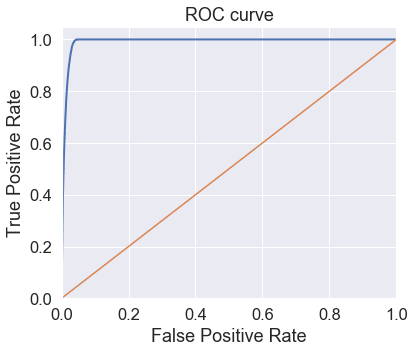

In [21]:
start_time = process_time()

clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

finish_time = process_time()
sec = finish_time - start_time

results(y_test, y_pred, sec)
ROC_curve(y_test, clf)

### Случайный лес

              precision    recall  f1-score   support

   recovered       1.00      0.97      0.98     33065
   uncovered       0.89      0.99      0.94      8079

   micro avg       0.97      0.97      0.97     41144
   macro avg       0.94      0.98      0.96     41144
weighted avg       0.98      0.97      0.98     41144


Площадь под ROC-кривой - 0.982
Время работы кода - 9.7031 сек


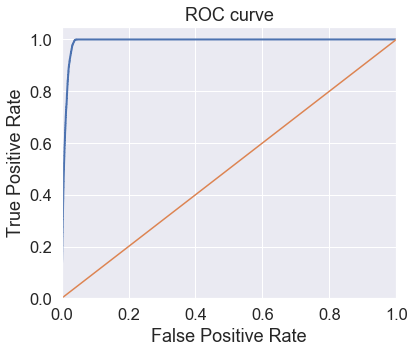

In [178]:
start_time = process_time()

rf = RandomForestClassifier(n_estimators=100, random_state=11)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

finish_time = process_time()
sec = finish_time - start_time

results(y_test, y_pred, sec)
ROC_curve(y_test, rf)

### Градиентный бустинг

              precision    recall  f1-score   support

   recovered       1.00      0.97      0.98     33065
   uncovered       0.89      1.00      0.94      8079

   micro avg       0.98      0.98      0.98     41144
   macro avg       0.95      0.98      0.96     41144
weighted avg       0.98      0.98      0.98     41144


Площадь под ROC-кривой - 0.9833

Время работы кода - 38.3594 сек


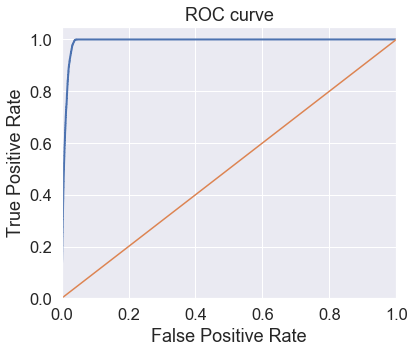

In [180]:
start_time = process_time()

GB = GBoost(loss = 'exponential')
GB.fit(X_train, y_train)
y_pred = GB.predict(X_test)

finish_time = process_time()
sec = finish_time - start_time

results(y_test, y_pred, sec)
ROC_curve(y_test, GB)

### Наивный Байес

              precision    recall  f1-score   support

   recovered       1.00      0.96      0.98    284599
   uncovered       0.41      0.99      0.58      8237

    accuracy                           0.96    292836
   macro avg       0.71      0.98      0.78    292836
weighted avg       0.98      0.96      0.97    292836


Площадь под ROC-кривой - 0.9754

Время работы кода - 1.3438 сек


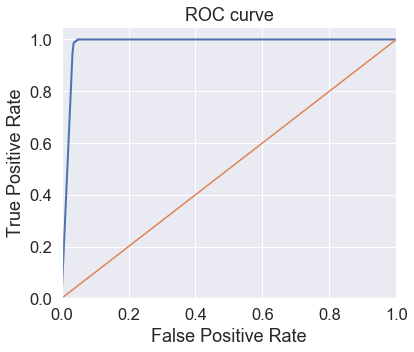

In [7]:
GaussianNB

start_time = process_time()

Bayes = GaussianNB()
Bayes.fit(X_train, y_train)
y_pred = Bayes.predict(X_test)

finish_time = process_time()
sec = finish_time - start_time

results(y_test, y_pred, sec)
ROC_curve(y_test, Bayes)

### K-nn

In [ ]:
start_time = process_time()

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)

finish_time = process_time()
sec = finish_time - start_time

results(y_test, y_pred, sec)
ROC_curve(y_test, neigh)

### SVM

In [ ]:
start_time = process_time()

svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

finish_time = process_time()
sec = finish_time - start_time

results(y_test, y_pred, sec)
ROC_curve(y_test, svm)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


# Уравнивание классов___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___  ___ ___ ___ ___ ___ ___ 

### Preprocessing

In [14]:
df = pd.read_csv("df_new_norm.csv")
df = df.iloc[:,1:]

print(df.shape[0])
df[df.recoveries == 1].shape[0]

887379


24677

In [15]:
df_1 = df[df.recoveries == 1]
df_0 = df[df.recoveries == 0]
df_0 = df_0.sample(100000)
df_bal = pd.concat([df_1, df_0])

df_y = df_bal['recoveries']
df_X = df_bal.drop('recoveries', axis='columns')

X_train, X_test, y_train, y_test = train_test_split( df_X, df_y, test_size=0.33, random_state=42)

y_test.sum()/y_test.count()

0.19635912891308574

### LogRegression

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

   recovered       1.00      0.96      0.98     33065
   uncovered       0.87      0.99      0.93      8079

    accuracy                           0.97     41144
   macro avg       0.93      0.98      0.95     41144
weighted avg       0.97      0.97      0.97     41144


Площадь под ROC-кривой - 0.9755

Время работы кода - 4.5156 сек


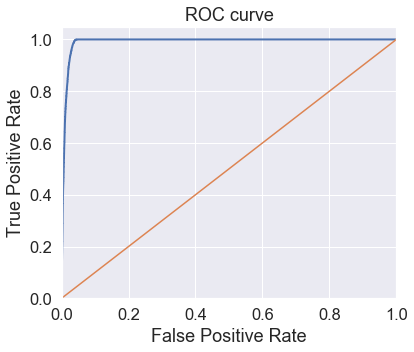

In [16]:
start_time = process_time()

clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

finish_time = process_time()
sec = finish_time - start_time

results(y_test, y_pred, sec)
ROC_curve(y_test, clf)

### Случайный лес

              precision    recall  f1-score   support

   recovered       1.00      0.97      0.99     33065
   uncovered       0.90      0.99      0.94      8079

   micro avg       0.98      0.98      0.98     41144
   macro avg       0.95      0.98      0.96     41144
weighted avg       0.98      0.98      0.98     41144


Площадь под ROC-кривой - 0.9828

Время работы кода - 8.4375 сек


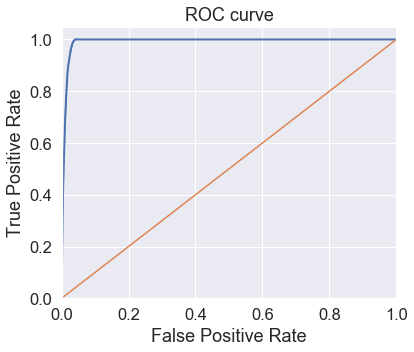

In [213]:
start_time = process_time()

rf = RandomForestClassifier(n_estimators=100, random_state=11)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

finish_time = process_time()
sec = finish_time - start_time

results(y_test, y_pred, sec)
ROC_curve(y_test, rf)

### Градиентный бустинг

              precision    recall  f1-score   support

   recovered       1.00      0.97      0.99     33065
   uncovered       0.90      1.00      0.95      8079

   micro avg       0.98      0.98      0.98     41144
   macro avg       0.95      0.98      0.97     41144
weighted avg       0.98      0.98      0.98     41144


Площадь под ROC-кривой - 0.9842

Время работы кода - 36.4375 сек


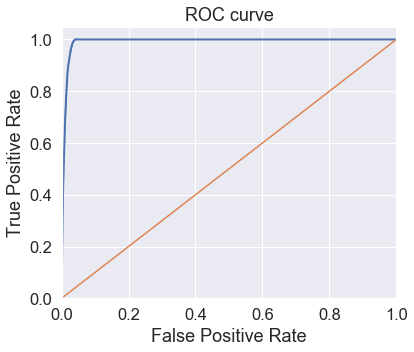

In [214]:
start_time = process_time()

GB = GBoost(loss = 'exponential')
GB.fit(X_train, y_train)
y_pred = GB.predict(X_test)

finish_time = process_time()
sec = finish_time - start_time

results(y_test, y_pred, sec)
ROC_curve(y_test, GB)

### Наивный Байес

              precision    recall  f1-score   support

   recovered       1.00      0.96      0.98     33065
   uncovered       0.84      0.99      0.91      8079

    accuracy                           0.96     41144
   macro avg       0.92      0.97      0.94     41144
weighted avg       0.97      0.96      0.96     41144


Площадь под ROC-кривой - 0.9748

Время работы кода - 0.2031 сек


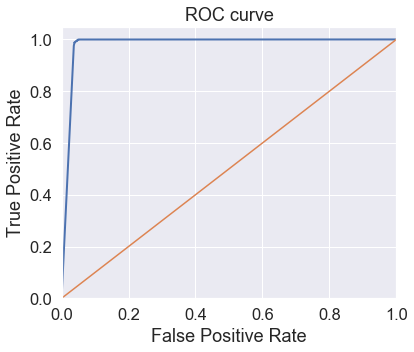

In [10]:
GaussianNB

start_time = process_time()

Bayes = GaussianNB()
Bayes.fit(X_train, y_train)
y_pred = Bayes.predict(X_test)

finish_time = process_time()
sec = finish_time - start_time

results(y_test, y_pred, sec)
ROC_curve(y_test, Bayes)

### K-nn

              precision    recall  f1-score   support

   recovered       0.98      0.97      0.98     33065
   uncovered       0.88      0.93      0.91      8079

   micro avg       0.96      0.96      0.96     41144
   macro avg       0.93      0.95      0.94     41144
weighted avg       0.96      0.96      0.96     41144


Площадь под ROC-кривой - 0.9519

Время работы кода - 190.6875 сек


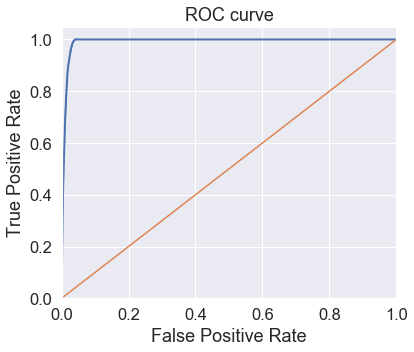

In [215]:
start_time = process_time()

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)

finish_time = process_time()
sec = finish_time - start_time

results(y_test, y_pred, sec)
ROC_curve(y_test, neigh)

### SVM

              precision    recall  f1-score   support

   recovered       1.00      0.97      0.98     33065
   uncovered       0.87      0.99      0.93      8079

   micro avg       0.97      0.97      0.97     41144
   macro avg       0.94      0.98      0.95     41144
weighted avg       0.97      0.97      0.97     41144


Площадь под ROC-кривой - 0.9761

Время работы кода - 282.8906 сек


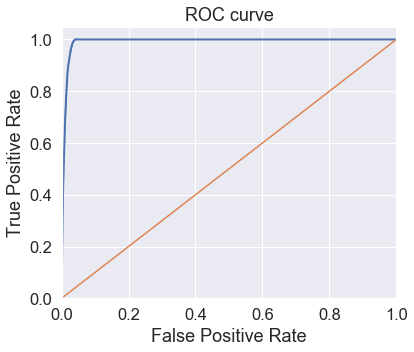

In [216]:
start_time = process_time()

svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

finish_time = process_time()
sec = finish_time - start_time

results(y_test, y_pred, sec)
ROC_curve(y_test, svm)

# Отбор признаков ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ 

### Preprocessing

In [11]:
#df = pd.read_csv("df_new_norm.csv")
#df = df.iloc[:,1:]

df_1 = df[df.recoveries == 1]
df_0 = df[df.recoveries == 0]
df_0 = df_0.sample(100000)
df_bal = pd.concat([df_1, df_0])

df_y = df_bal['recoveries']
df_X = df_bal.drop('recoveries', axis=1)


print(df_X.shape[1])
print('\n')

print(cross_val_score(LogisticRegression(), df_X, df_y, scoring='neg_log_loss').mean())
x_data_kbest = SelectKBest(f_classif, k=20).fit_transform(df_X, df_y)
print(cross_val_score(LogisticRegression(), x_data_kbest, df_y, scoring='neg_log_loss').mean())

df_X = x_data_kbest
X_train, X_test, y_train, y_test = train_test_split( df_X, df_y, test_size=0.33, random_state=42)

50




C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

-0.24506238173651723
-0.21292174022039853


### LogRegression

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

   recovered       1.00      0.97      0.98     33065
   uncovered       0.88      0.99      0.93      8079

   micro avg       0.97      0.97      0.97     41144
   macro avg       0.94      0.98      0.95     41144
weighted avg       0.97      0.97      0.97     41144


Площадь под ROC-кривой - 0.976

Время работы кода - 1.7656 сек


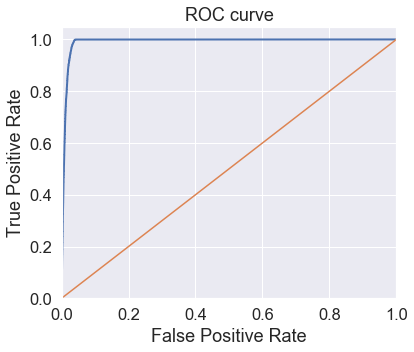

In [183]:
start_time = process_time()

clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

finish_time = process_time()
sec = finish_time - start_time

results(y_test, y_pred, sec)
ROC_curve(y_test, clf)

### Случайный лес

              precision    recall  f1-score   support

   recovered       1.00      0.97      0.98     33065
   uncovered       0.90      0.99      0.94      8079

   micro avg       0.98      0.98      0.98     41144
   macro avg       0.95      0.98      0.96     41144
weighted avg       0.98      0.98      0.98     41144


Площадь под ROC-кривой - 0.9817

Время работы кода - 10.6719 сек


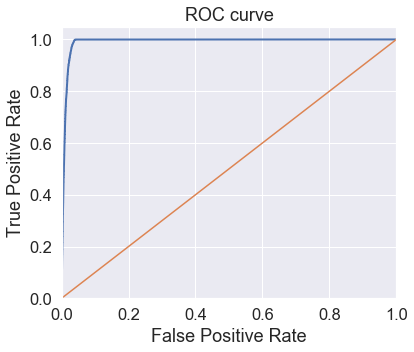

In [184]:
start_time = process_time()

rf = RandomForestClassifier(n_estimators=100, random_state=11)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

finish_time = process_time()
sec = finish_time - start_time

results(y_test, y_pred, sec)
ROC_curve(y_test, rf)

### Градиентный бустинг

              precision    recall  f1-score   support

   recovered       1.00      0.97      0.98     33065
   uncovered       0.89      1.00      0.94      8079

   micro avg       0.98      0.98      0.98     41144
   macro avg       0.95      0.98      0.96     41144
weighted avg       0.98      0.98      0.98     41144


Площадь под ROC-кривой - 0.9833

Время работы кода - 38.3594 сек


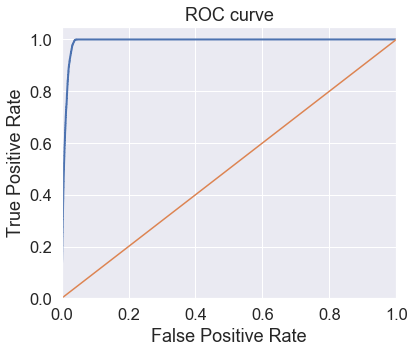

In [180]:
start_time = process_time()

GB = GBoost(loss = 'exponential')
GB.fit(X_train, y_train)
y_pred = GB.predict(X_test)

finish_time = process_time()
sec = finish_time - start_time

results(y_test, y_pred, sec)
ROC_curve(y_test, GB)

### Наивный Байес

              precision    recall  f1-score   support

   recovered       1.00      0.96      0.98     33065
   uncovered       0.84      0.99      0.91      8079

    accuracy                           0.96     41144
   macro avg       0.92      0.97      0.94     41144
weighted avg       0.97      0.96      0.96     41144


Площадь под ROC-кривой - 0.9748

Время работы кода - 0.2031 сек


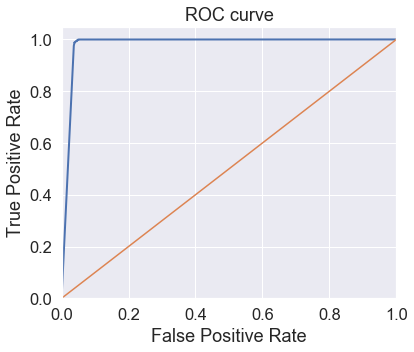

In [10]:
GaussianNB

start_time = process_time()

Bayes = GaussianNB()
Bayes.fit(X_train, y_train)
y_pred = Bayes.predict(X_test)

finish_time = process_time()
sec = finish_time - start_time

results(y_test, y_pred, sec)
ROC_curve(y_test, Bayes)

### K-nn

              precision    recall  f1-score   support

   recovered       0.98      0.97      0.98     33065
   uncovered       0.88      0.94      0.91      8079

   micro avg       0.96      0.96      0.96     41144
   macro avg       0.93      0.95      0.94     41144
weighted avg       0.96      0.96      0.96     41144


Площадь под ROC-кривой - 0.9523

Время работы кода - 232.5625 сек


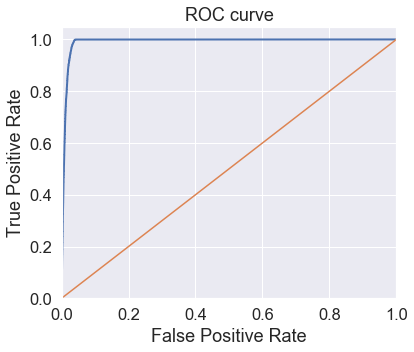

In [185]:
start_time = process_time()

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)

finish_time = process_time()
sec = finish_time - start_time

results(y_test, y_pred, sec)
ROC_curve(y_test, neigh)

### SVM

In [ ]:
start_time = process_time()

svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

finish_time = process_time()
sec = finish_time - start_time

results(y_test, y_pred, sec)
ROC_curve(y_test, svm)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


# Доработка моделей ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___  

### Preprocessing

In [17]:
df = pd.read_csv("df_new_norm.csv")
df = df.iloc[:,1:]

df_1 = df[df.recoveries == 1]
df_0 = df[df.recoveries == 0]
df_0 = df_0.sample(100000)
df_bal = pd.concat([df_1, df_0])

df_y = df_bal['recoveries']
df_X = df_bal.drop('recoveries', axis=1)

X_train, X_test, y_train, y_test = train_test_split( df_X, df_y, test_size=0.33, random_state=42)
df.head()

,final_d,emp_length_int,annual_inc,loan_condition_cat,interest_rate,dti,total_pymnt,recoveries,installment,year_2008y,...,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,region_Northern-Irl,region_cannught,region_leinster,region_ulster
0,0.000064,1.000000,0.002526,0.0,0.225180,0.002765,0.101442,0.0,0.102952,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.272755,0.000000,0.003158,1.0,0.420363,0.000100,0.017459,1.0,0.030886,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.454571,1.000000,0.001290,0.0,0.449514,0.000872,0.051986,0.0,0.048021,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.000064,1.000000,0.005179,0.0,0.345163,0.002000,0.211610,0.0,0.226355,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.000073,0.052632,0.008421,0.0,0.311365,0.001794,0.056115,0.0,0.036453,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### LogRegression

In [200]:
start_time = process_time()

parameters = {
    'C'      : [0.001,0.01,0.1,1,10,100,1000],
    'penalty': ['l1','l2']
    }

gr_lr = GridSearchCV(LogisticRegression(solver = 'saga', n_jobs=-1, random_state=17), parameters)
gr_lr.fit(X_train, y_train)

finish_time = process_time()
sec = finish_time - start_time

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


              precision    recall  f1-score   support

   recovered       1.00      0.97      0.98     33065
   uncovered       0.87      0.99      0.93      8079

    accuracy                           0.97     41144
   macro avg       0.94      0.98      0.95     41144
weighted avg       0.97      0.97      0.97     41144


Площадь под ROC-кривой - 0.9754

Время работы кода - 0.1094 сек


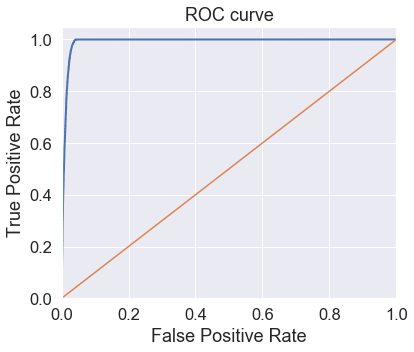

In [29]:
start_time = process_time()

clf = LogisticRegression(C=100, n_jobs=-1, random_state=17)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf_res = y_pred

finish_time = process_time()
sec = finish_time - start_time

results(y_test, y_pred, sec)
ROC_curve(y_test, clf)

### Случайный лес

In [203]:
start_time = process_time()

parameters = {
    'n_estimators'      : [100,150,200],
    'max_depth'         : [7, 10, 13]
    }

gr_rf = GridSearchCV(ensemble.RandomForestClassifier(), parameters, cv=10, n_jobs=-1)
gr_rf.fit(X_train, y_train)

finish_time = process_time()
sec = finish_time - start_time

In [87]:
print(round(sec), 4)
gr_rf.best_params_

{'max_depth': 13, 'n_estimators': 100}

              precision    recall  f1-score   support

   recovered       1.00      0.97      0.98     33065
   uncovered       0.89      0.99      0.94      8079

    accuracy                           0.97     41144
   macro avg       0.94      0.98      0.96     41144
weighted avg       0.98      0.97      0.97     41144


Площадь под ROC-кривой - 0.9816

Время работы кода - 5.9062 сек


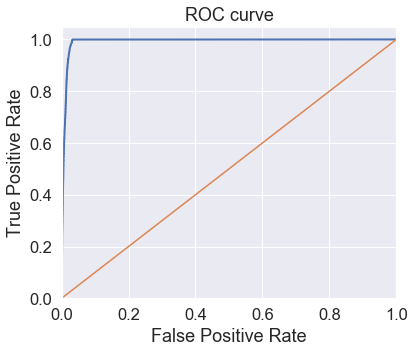

In [30]:
start_time = process_time()

rf = ensemble.RandomForestClassifier(n_estimators=100, random_state=0, max_depth = 13, min_samples_leaf = 5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf_res = y_pred

finish_time = process_time()
sec = finish_time - start_time

results(y_test, y_pred, sec)
ROC_curve(y_test, rf)

### Градиентный бустинг

In [153]:
start_time = process_time()

parameters = {
    'n_estimators'      : [100,150,200],
    'max_depth'         : [3, 5, 7]
    }

gr_gb = GridSearchCV(GBoost(loss = 'exponential'), parameters, cv=10, n_jobs=-1)
gr_gb.fit(X_train, y_train)

finish_time = process_time()
sec = finish_time - start_time

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sa...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 150, 200], 'max_depth': [3, 5, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [154]:
print(round(sec), 4)
gr_gb.best_params_

{'max_depth': 7, 'n_estimators': 200}

              precision    recall  f1-score   support

   recovered       1.00      0.98      0.99     33065
   uncovered       0.94      0.99      0.96      8079

    accuracy                           0.98     41144
   macro avg       0.97      0.98      0.98     41144
weighted avg       0.98      0.98      0.98     41144


Площадь под ROC-кривой - 0.9846

Время работы кода - 76.0938 сек


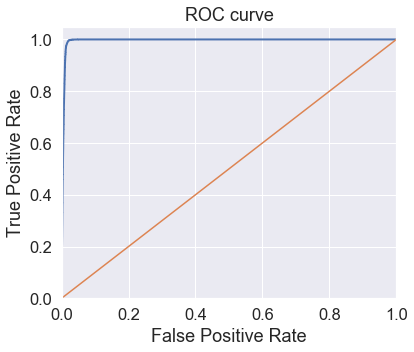

In [31]:
start_time = process_time()

GB = GBoost(loss = 'exponential', max_depth  = 7, n_estimators = 200)
GB.fit(X_train, y_train)
y_pred = GB.predict(X_test)
gb_res = y_pred


finish_time = process_time()
sec = finish_time - start_time

results(y_test, y_pred, sec)
ROC_curve(y_test, GB)

### Наивный Байес

In [ ]:
start_time = process_time()

parameters = {
    'n_estimators'      : [100,150,200],
    'max_depth'         : [3, 5, 7]
    }

gr_Bayes = GridSearchCV(GaussianNB(), parameters, cv=10, n_jobs=-1)
gr_gb.fit(X_train, y_train)

finish_time = process_time()
sec = finish_time - start_time

In [ ]:
print(round(sec), 4)
gr_gb.best_params_

              precision    recall  f1-score   support

   recovered       1.00      0.96      0.98     33065
   uncovered       0.85      1.00      0.92      8079

    accuracy                           0.96     41144
   macro avg       0.92      0.98      0.95     41144
weighted avg       0.97      0.96      0.97     41144


Площадь под ROC-кривой - 0.9759

Время работы кода - 0.1875 сек


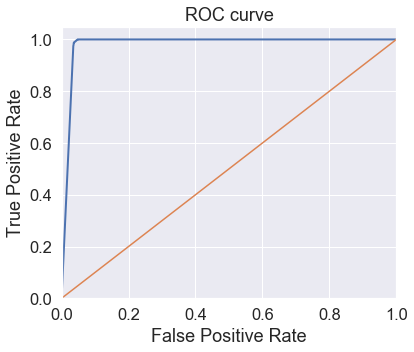

In [23]:
GaussianNB

start_time = process_time()

Bayes = GaussianNB()
Bayes.fit(X_train, y_train)
y_pred = Bayes.predict(X_test)
Bayes_res = y_pred

finish_time = process_time()
sec = finish_time - start_time

results(y_test, y_pred, sec)
ROC_curve(y_test, Bayes)

### K-nn

              precision    recall  f1-score   support

   recovered       0.98      0.97      0.98     33065
   uncovered       0.88      0.93      0.91      8079

    accuracy                           0.96     41144
   macro avg       0.93      0.95      0.94     41144
weighted avg       0.96      0.96      0.96     41144


Площадь под ROC-кривой - 0.9512

Время работы кода - 149.375 сек


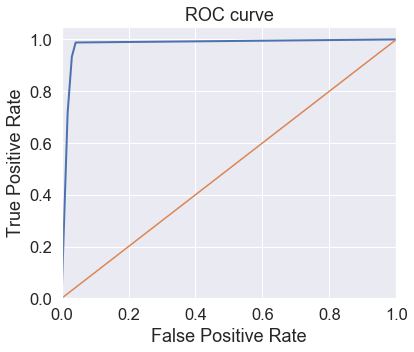

In [24]:
start_time = process_time()

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
knn_res = y_pred


finish_time = process_time()
sec = finish_time - start_time

results(y_test, y_pred, sec)
ROC_curve(y_test, neigh)

### SVM

In [25]:
start_time = process_time()

svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
svm_res = y_pred

finish_time = process_time()
sec = finish_time - start_time

results(y_test, y_pred, sec)
ROC_curve(y_test, svm)

              precision    recall  f1-score   support

   recovered       1.00      0.96      0.98     33065
   uncovered       0.87      0.99      0.92      8079

    accuracy                           0.97     41144
   macro avg       0.93      0.97      0.95     41144
weighted avg       0.97      0.97      0.97     41144


Площадь под ROC-кривой - 0.9748

Время работы кода - 283.8281 сек


AttributeError: predict_proba is not available when  probability=False

<Figure size 432x360 with 0 Axes>

### Сводный алгоритм

In [32]:
all_res = (0.16*svm_res + 0.16*knn_res + 0.2*gb_res + 0.16*Bayes_res + 0.16*rf_res + 0.16*clf_res)

y_all = []

for i in all_res:
    y_all.append(round(i))

results(y_test, y_all)
#ROC_curve(y_test, svm)

              precision    recall  f1-score   support

   recovered       1.00      0.97      0.98     33065
   uncovered       0.88      0.99      0.93      8079

    accuracy                           0.97     41144
   macro avg       0.94      0.98      0.96     41144
weighted avg       0.97      0.97      0.97     41144


Площадь под ROC-кривой - 0.9795
